In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qibo
import qibolab
from qibolab import Platform
from qibolab.pulses import PulseSequence

print(qibo.__version__)
print(qibolab.__version__)

0.1.9
0.0.1.dev6


In [2]:
platform = Platform('tii_rfsoc4x2')

[Qibo 0.1.9|INFO|2022-12-20 10:31:27]: Loading platform tii_rfsoc4x2 from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/tii_rfsoc4x2.yml


In [3]:
qd_pulse = platform.create_RX_pulse(0, start=0)
ro_pulse = platform.create_MZ_pulse(0, start=qd_pulse.start)

sequence = PulseSequence()
sequence.add(qd_pulse)
sequence.add(ro_pulse)

print(sequence)

PulseSequence
ReadoutPulse(0, 3000, 0.02, 7_295_238_290, 0, Rectangular(), 0, 0)
Pulse(0, 114, 0.53, 5_236_300_000, 0, Drag(30, 0.05096), 1, PulseType.DRIVE, 0)


In [4]:
platform.connect()
platform.setup()
msr, phase, avgi, avgq = platform.execute_pulse_sequence(sequence)
print((avgi, avgq))

[Qibo 0.1.9|INFO|2022-12-20 10:31:35]: Connecting to tii_rfsoc4x2 instrument tii_rfsoc4x2.


(6.990035671290016, 20.974400603635377)


In [5]:
start = 10
stop = 2000
step = 50
platform.connect()
lengths = np.arange(start, stop, step)
results = []
for i, length in enumerate(lengths):
    qd_pulse = platform.create_RX_pulse(0, start=0)
    ro_pulse = platform.create_MZ_pulse(0, start=qd_pulse.start)
    qd_pulse.duration = length
    qd_pulse.shape.rel_sigma = length/4

    sequence = PulseSequence()
    sequence.add(qd_pulse)
    sequence.add(ro_pulse)
    platform.setup()
    msr, phase, avgi, avgq = platform.execute_pulse_sequence(sequence)
    results.append((avgi, avgq))

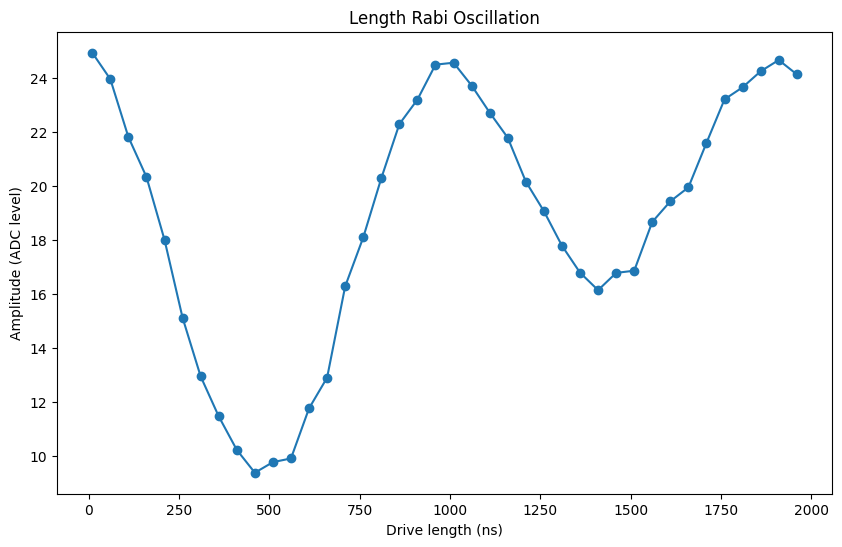

In [6]:
results = np.array(results)
amp = np.abs(results[:, 0] + 1j * results[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(lengths, amp, 'o-')
plt.title("Length Rabi Oscillation")
plt.xlabel("Drive length (ns)")
plt.ylabel("Amplitude (ADC level)")
plt.savefig("")

In [54]:
results = np.array(results)
results.shape

(18, 2)